## Preparing the dataset 

In [1]:
import pandas as pd 

airQualityData = pd.read_csv('station_hour.csv')

airQualityData.info() 

C:\Users\cleyc\AppData\Local\Temp\ipykernel_17552\114647825.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  airQualityData = pd.read_csv('station_hour.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [2]:
airQualityData['StationId'].unique()

# A lot of stations to choose from - preferably we will choose the one with the most in it 

array(['AP001', 'AP005', 'AS001', 'BR005', 'BR006', 'BR007', 'BR008',
       'BR009', 'BR010', 'CH001', 'DL001', 'DL002', 'DL003', 'DL004',
       'DL005', 'DL006', 'DL007', 'DL008', 'DL009', 'DL010', 'DL011',
       'DL012', 'DL013', 'DL014', 'DL015', 'DL016', 'DL017', 'DL018',
       'DL019', 'DL020', 'DL021', 'DL022', 'DL023', 'DL024', 'DL025',
       'DL026', 'DL027', 'DL028', 'DL029', 'DL030', 'DL031', 'DL032',
       'DL033', 'DL034', 'DL035', 'DL036', 'DL037', 'DL038', 'GJ001',
       'HR011', 'HR012', 'HR013', 'HR014', 'JH001', 'KA002', 'KA003',
       'KA004', 'KA005', 'KA006', 'KA007', 'KA008', 'KA009', 'KA010',
       'KA011', 'KL002', 'KL004', 'KL007', 'KL008', 'MH005', 'MH006',
       'MH007', 'MH008', 'MH009', 'MH010', 'MH011', 'MH012', 'MH013',
       'MH014', 'ML001', 'MP001', 'MZ001', 'OD001', 'OD002', 'PB001',
       'RJ004', 'RJ005', 'RJ006', 'TG001', 'TG002', 'TG003', 'TG004',
       'TG005', 'TG006', 'TN001', 'TN002', 'TN003', 'TN004', 'TN005',
       'UP012', 'UP0

In [3]:
#But first we have to clean the dataset..

airQualityData.isna().mean()

#Welp time to weed out the ones with more than 30% null 


StationId     0.000000
Datetime      0.000000
PM2.5         0.250162
PM10          0.432297
NO            0.213864
NO2           0.204309
NOx           0.189568
NH3           0.477628
CO            0.192849
SO2           0.286873
O3            0.280398
Benzene       0.332774
Toluene       0.402600
Xylene        0.801482
AQI           0.220229
AQI_Bucket    0.220229
dtype: float64

In [4]:
for column in airQualityData.columns.tolist():
    if airQualityData[column].isna().mean() > 0.3: 
        airQualityData = airQualityData.drop([column], axis = 1)
        print(column, 'is dropped')

airQualityData.columns

PM10 is dropped
NH3 is dropped
Benzene is dropped
Toluene is dropped
Xylene is dropped


Index(['StationId', 'Datetime', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3',
       'AQI', 'AQI_Bucket'],
      dtype='object')

In [5]:
# Fill the current NA with the average

airQualityData = airQualityData.fillna(airQualityData.mean(numeric_only = True))

#Alright the data should now be usable! 

import seaborn as sns 

data = ['', 0]

for station in airQualityData['StationId'].unique().tolist():
    count = len(airQualityData.loc[airQualityData['StationId'] ==  station])
    if count > data[1]:
        data[0] = station
        data[1] = count

data

#We're going to stick with DL007 station specifically for this since it has the most samples to work with 

['DL007', 48192]

In [6]:
DL007Data = airQualityData.loc[airQualityData['StationId'] ==  'DL007']

DL007Data = DL007Data.sort_values(by = 'Datetime', ascending = True).drop(['AQI_Bucket', 'StationId'], axis = 1).reset_index(drop = True)

DL007Data['Datetime'] = pd.to_datetime(DL007Data['Datetime'])
DL007Data['Date'] = DL007Data['Datetime']

DL007Data = DL007Data.set_index('Datetime')


DL007Data.head()

#With this, the dataset should be ready for a model 

,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,Date
Datetime,,,,,,,,,
2015-01-01 01:00:00,598.51,69.03,35.69,104.72,0.58,12.116025,108.020000,180.173027,2015-01-01 01:00:00
2015-01-01 02:00:00,655.93,80.36,35.58,115.94,0.55,12.116025,121.380000,180.173027,2015-01-01 02:00:00
2015-01-01 03:00:00,657.68,94.69,35.45,130.13,0.51,12.116025,38.064085,180.173027,2015-01-01 03:00:00
2015-01-01 04:00:00,690.24,88.06,35.51,123.57,0.53,12.116025,38.064085,180.173027,2015-01-01 04:00:00
2015-01-01 05:00:00,625.27,70.91,35.82,106.74,0.58,12.116025,38.064085,180.173027,2015-01-01 05:00:00


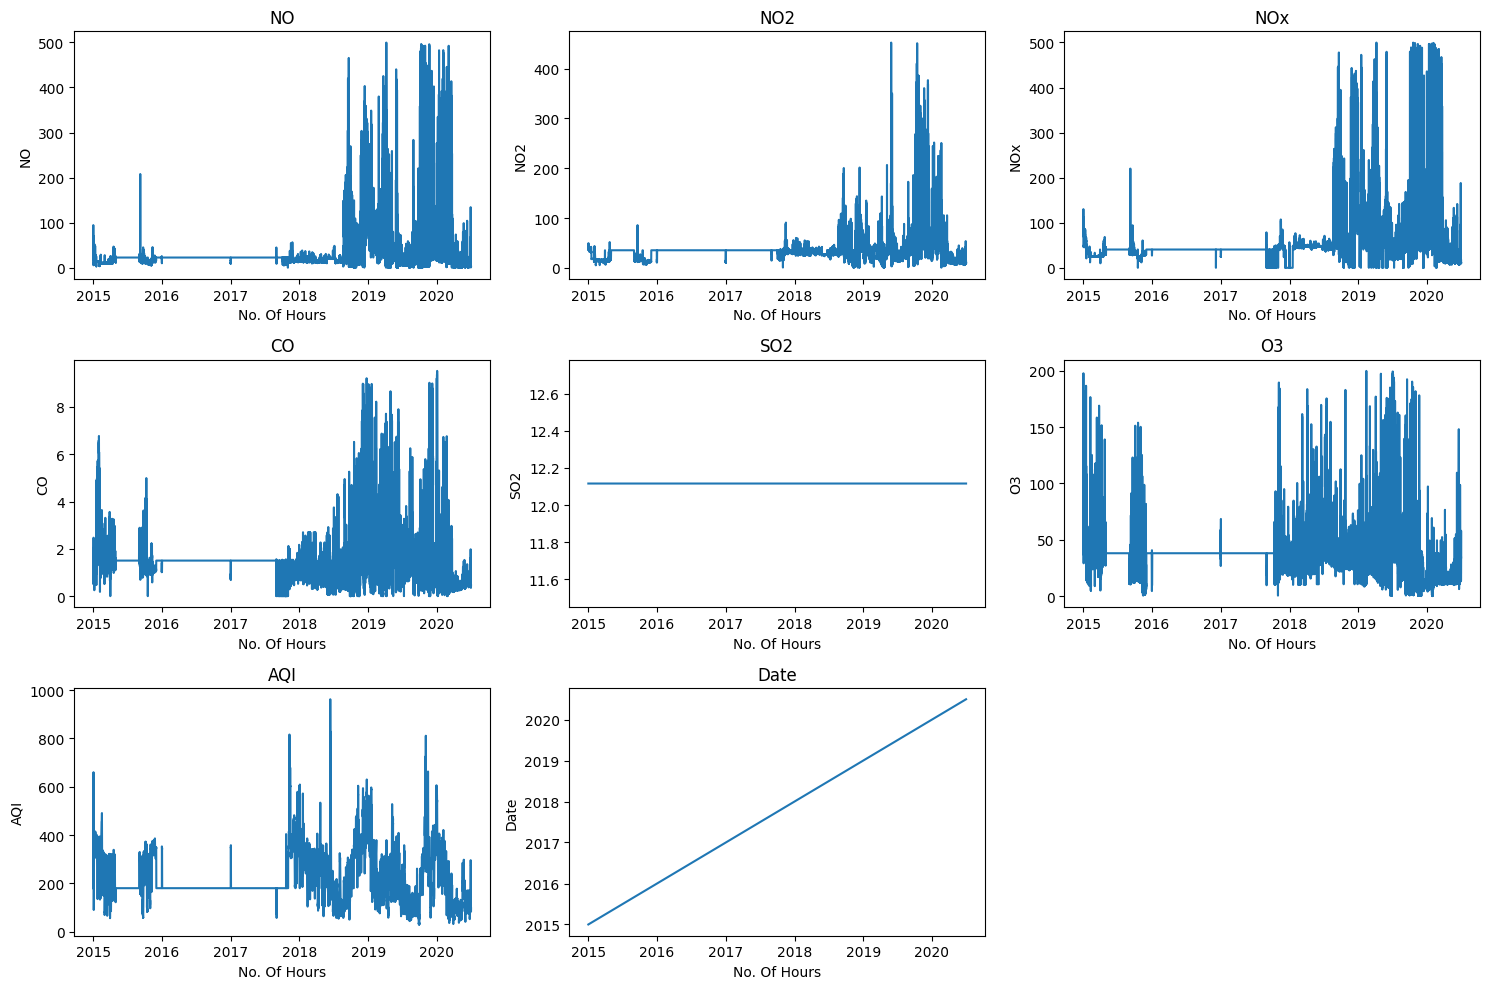

In [7]:
# A quick graph representation to get a good idea of the overall dataset

from matplotlib import pyplot as plt 

plt.figure(figsize=(15,10))

for index, column in enumerate(DL007Data.columns.tolist()[1:]):
    plt.subplot(3, 3, index + 1)
    plt.plot(DL007Data[column])
    plt.xlabel('No. Of Hours')
    plt.ylabel(column)
    plt.title(column)


plt.tight_layout()
plt.show()

#Judging from here there was a gap that needs to be addressed since the line clearly indicates the area that the fillna filled.

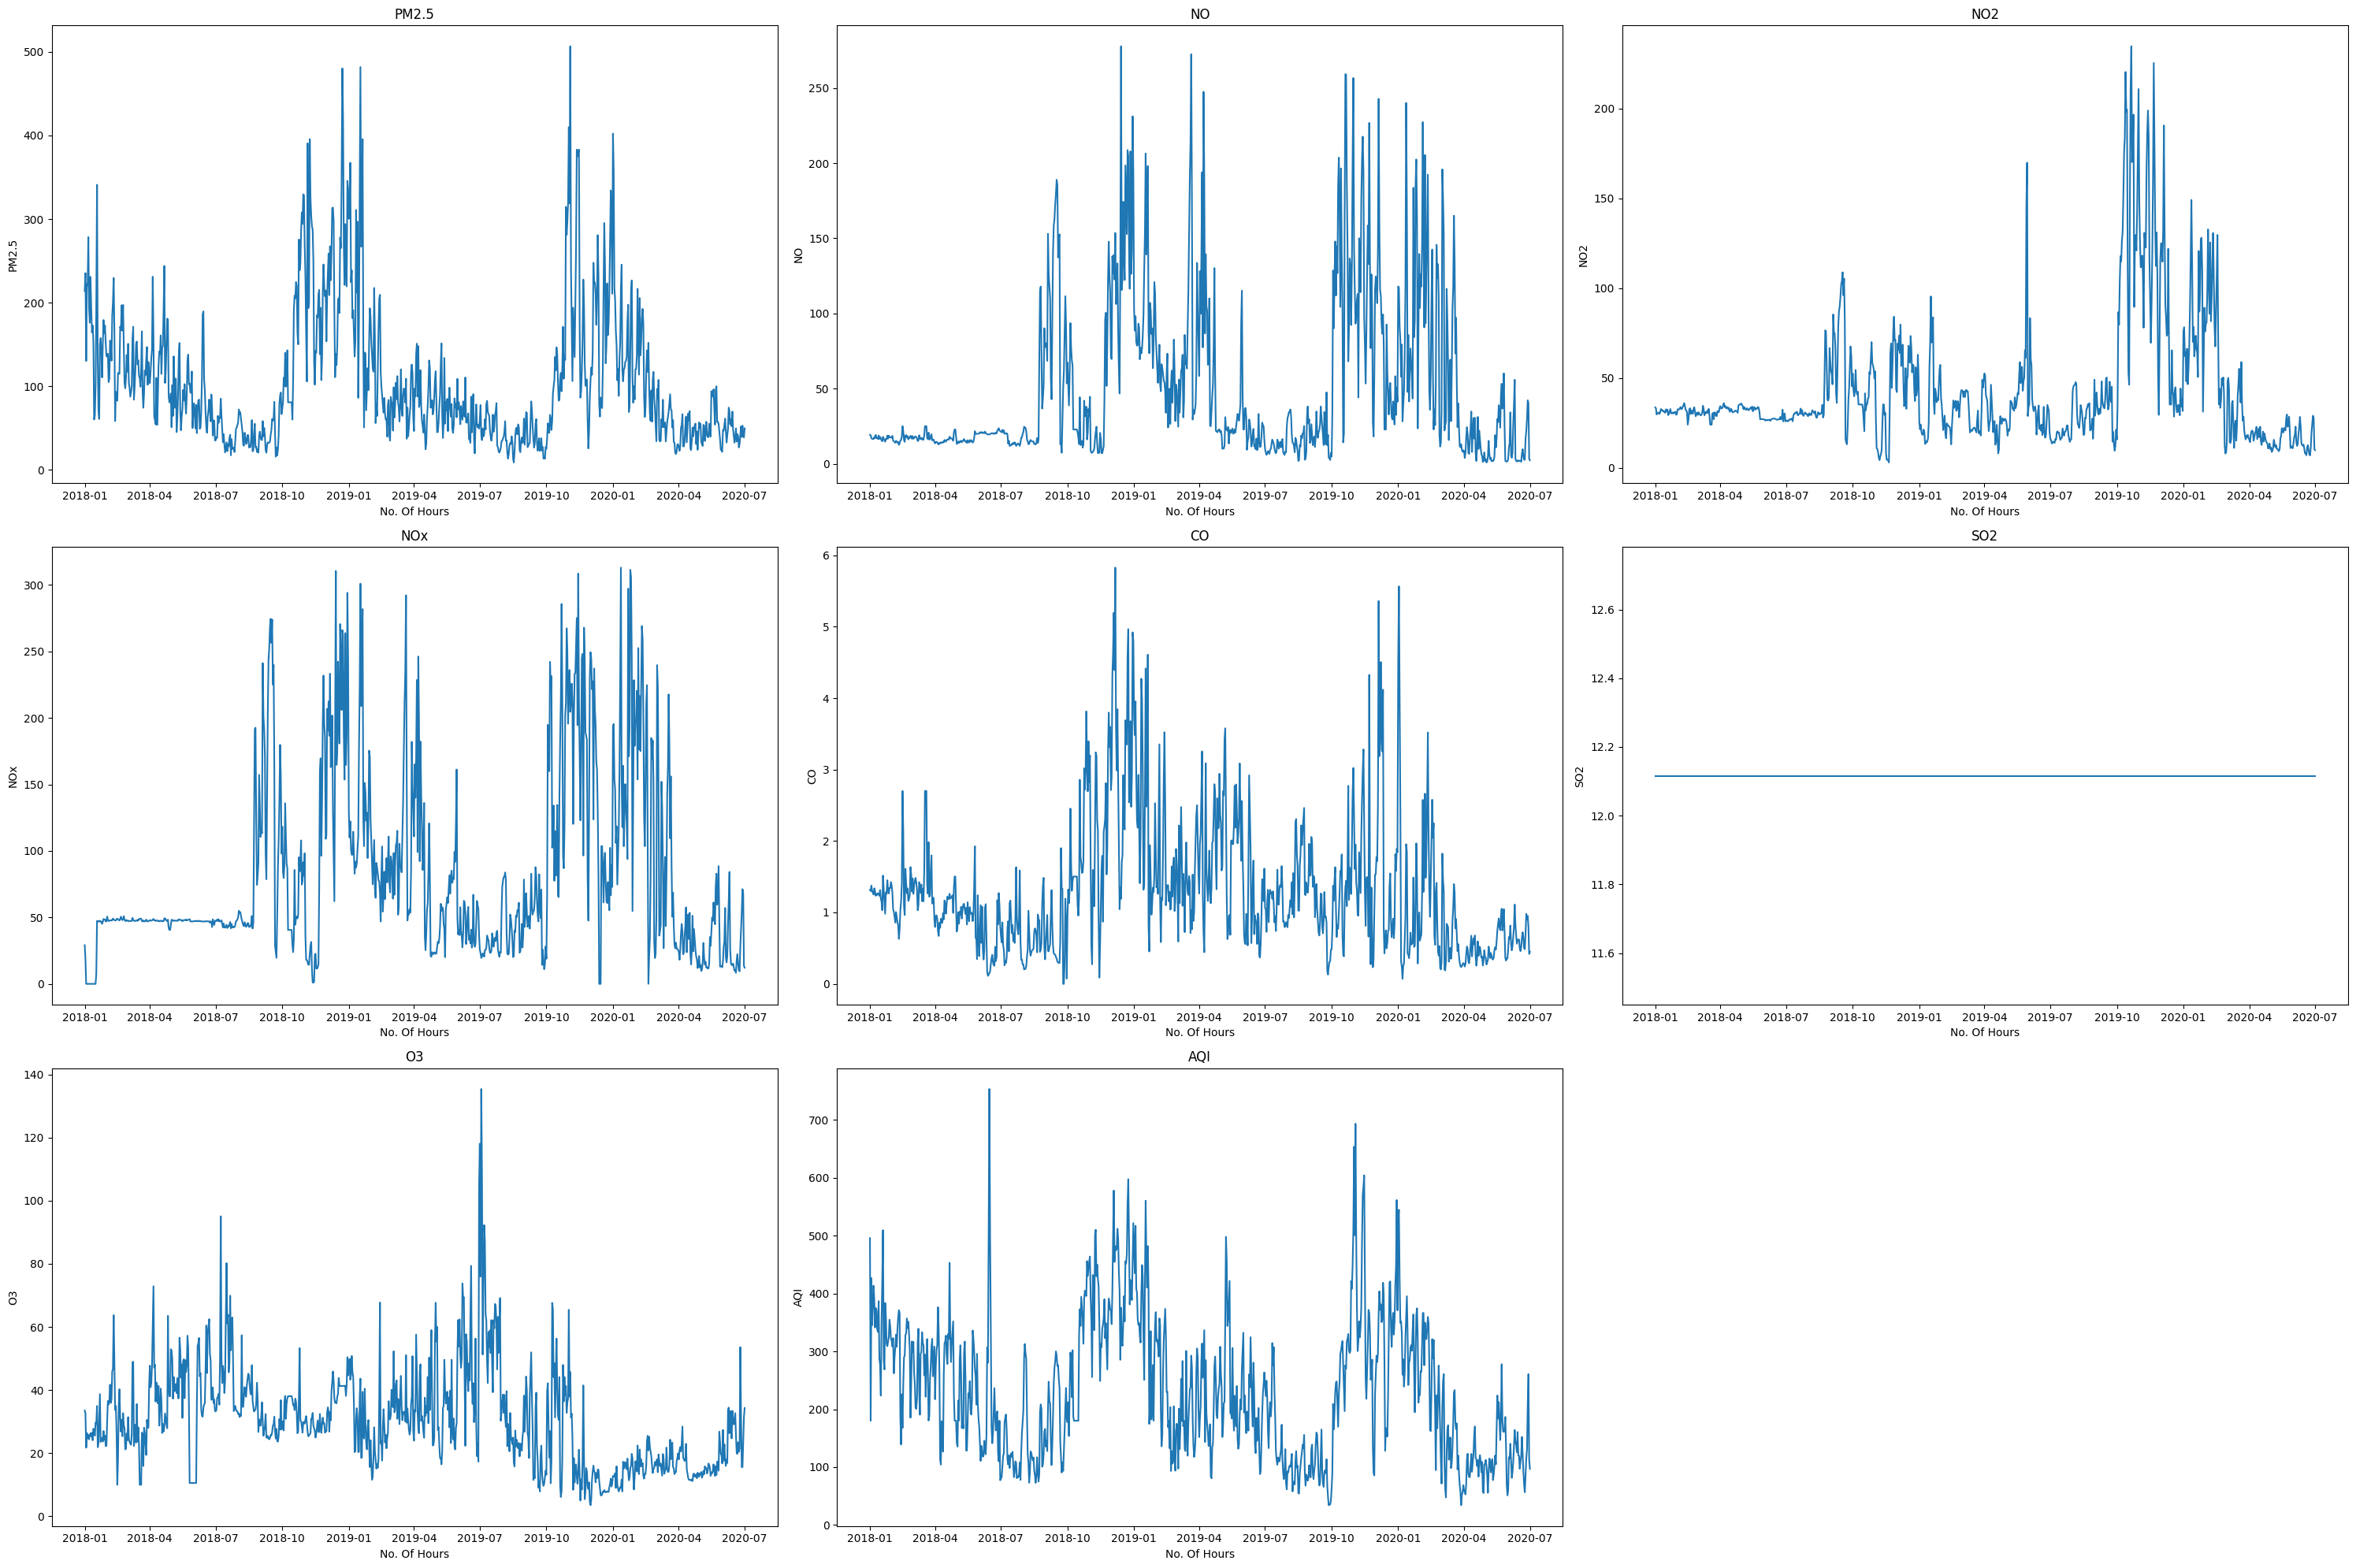

In [8]:
DL007Data['Year'] = DL007Data['Date'].dt.year

DL007Data = DL007Data.loc[DL007Data['Year'] >= 2018].groupby(pd.Grouper(freq = '1d')).mean(numeric_only = True).drop(['Year'], axis = 1)
# I also made the frequency to every 5 days so the graph looks much less chaotic and things get each to process


plt.figure(figsize=(30,20))

for index, column in enumerate(DL007Data.columns.tolist()[:]):
    plt.subplot(3, 3, index + 1)
    plt.plot(DL007Data[column])
    plt.xlabel('No. Of Hours')
    plt.ylabel(column)
    plt.title(column)


plt.tight_layout()
plt.show()

#Better


## Setting up the prediction model 

This prediction model is going to use a LSTM network

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(DL007Data) #size = 21889
print(data[1:8].shape)
data2 = scaler.inverse_transform(data[1: 8])
#Making the data in a more divisible number

X = []
y = []

sequenceLength = 60 #2 months worth of data
predictionLength = 1 #1 day worth of prediction 

for i in range(len(data) - sequenceLength - predictionLength + 1):
    X.append(data[i: i + sequenceLength])
    y.append(data[i + sequenceLength])

import numpy as np 

X = np.array(X)
y = np.array(y)

#generating the sequence of data for the LTSM to train from 


from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle = False)

#Split the data 




(7, 8)


In [10]:
#Before we get onto building the LTSM we need to transform our 3 dimensional array 

sequence, items, rows = Xtrain.shape

Xtrain = Xtrain.reshape(sequence, rows, items)

sequence, items, rows = Xtest.shape

Xtest = Xtest.reshape(sequence, rows, items)

#Here comes the best part! Starting up the model 

Xtrain.shape

(639, 8, 60)

In [104]:

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam


LSTMmodel = Sequential()

LSTMmodel.add(LSTM(units=250, activation = 'sigmoid', input_shape= Xtrain.shape[1:]))

LSTMmodel.add(Dense(units=8)) 

optimizer = Adam(learning_rate=0.005)

LSTMmodel.compile(optimizer= optimizer, loss='mean_squared_error')

LSTMmodel.fit(Xtrain, ytrain, epochs = 5, batch_size = 1)


Epoch 1/5
639/639 [==============================] - 4s 5ms/step - loss: 0.4613
Epoch 2/5
639/639 [==============================] - 3s 4ms/step - loss: 0.3393
Epoch 3/5
639/639 [==============================] - 3s 4ms/step - loss: 0.3050
Epoch 4/5
639/639 [==============================] - 3s 4ms/step - loss: 0.2715
Epoch 5/5
639/639 [==============================] - 3s 4ms/step - loss: 0.2612


In [105]:
ypredict = LSTMmodel.predict(Xtest)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(ytest, ypredict)

mae

#A reasonable mae, so we're moving on 

7/7 [==============================] - 0s 10ms/step


0.46842571551908424

In [106]:
def makeWeeklyAirPrediction(monthData):
    dataGathered = []
    data = scaler.transform(monthData).T

    for i in range(7):
        ypredict = LSTMmodel.predict(np.array([data]))
        dataGathered.append(ypredict[0])
        data = np.concatenate([data[:, 1:], ypredict.T], axis = 1)

    return scaler.inverse_transform(np.array(dataGathered))

#Tada! we now have the function that could predict a week ahead of data using one month

#Let's test it with a random segment of the main dataset 

weekPrediction = makeWeeklyAirPrediction(DL007Data.iloc[:60])

#it works !

weekPrediction

1/1 [==============================] - 0s 21ms/step


array([[167.4103   , 152.58505  ,  86.89695  , 186.3606   ,   2.2870963,
         11.97972  ,  38.88397  , 328.02475  ],
       [168.43689  , 130.22069  ,  79.87013  , 161.57033  ,   2.4400125,
         11.99809  ,  36.783726 , 329.7177   ],
       [163.82352  , 113.31453  ,  64.104805 , 149.37578  ,   2.2812593,
         12.0478945,  37.648315 , 328.15256  ],
       [150.92616  , 105.9103   ,  63.35025  , 143.28741  ,   2.1438665,
         12.065395 ,  35.490845 , 307.2973   ],
       [146.84828  , 128.41393  ,  71.90561  , 164.304    ,   2.1279194,
         12.032289 ,  35.801876 , 283.12863  ],
       [165.55386  , 141.87329  ,  78.81096  , 180.65202  ,   2.3881936,
         12.005261 ,  32.73187  , 293.43445  ],
       [181.81294  , 142.19516  ,  90.92014  , 187.17897  ,   2.4931638,
         11.977875 ,  32.52646  , 335.62604  ]], dtype=float32)

In [102]:
#let's process this into a dataframe 

predictionData = pd.DataFrame(weekPrediction, columns = DL007Data.columns)

predictionData['Date'] = DL007Data.iloc[53:60].index  + pd.DateOffset(days=7)

predictionData.set_index('Date')

,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2018-03-02,155.832336,106.576363,80.297157,140.807297,1.662349,12.114357,37.005909,311.708740
2018-03-03,151.055664,84.200951,72.742249,118.660194,1.819443,12.118492,32.742874,301.457062
2018-03-04,151.625854,71.578011,57.646912,108.957649,1.793465,12.119790,34.375092,296.931458
2018-03-05,140.436508,56.293438,54.634682,101.866104,1.572008,12.099617,34.035515,282.968964
2018-03-06,125.743851,79.435501,62.828678,120.120285,1.616366,12.091082,33.265419,257.465118
2018-03-07,135.549820,91.757271,69.096672,132.485504,1.771834,12.064791,30.409122,253.993637
2018-03-08,150.542450,80.742668,76.235596,126.769669,1.788850,12.081327,32.017220,295.859192


1/1 [==============================] - 0s 25ms/step


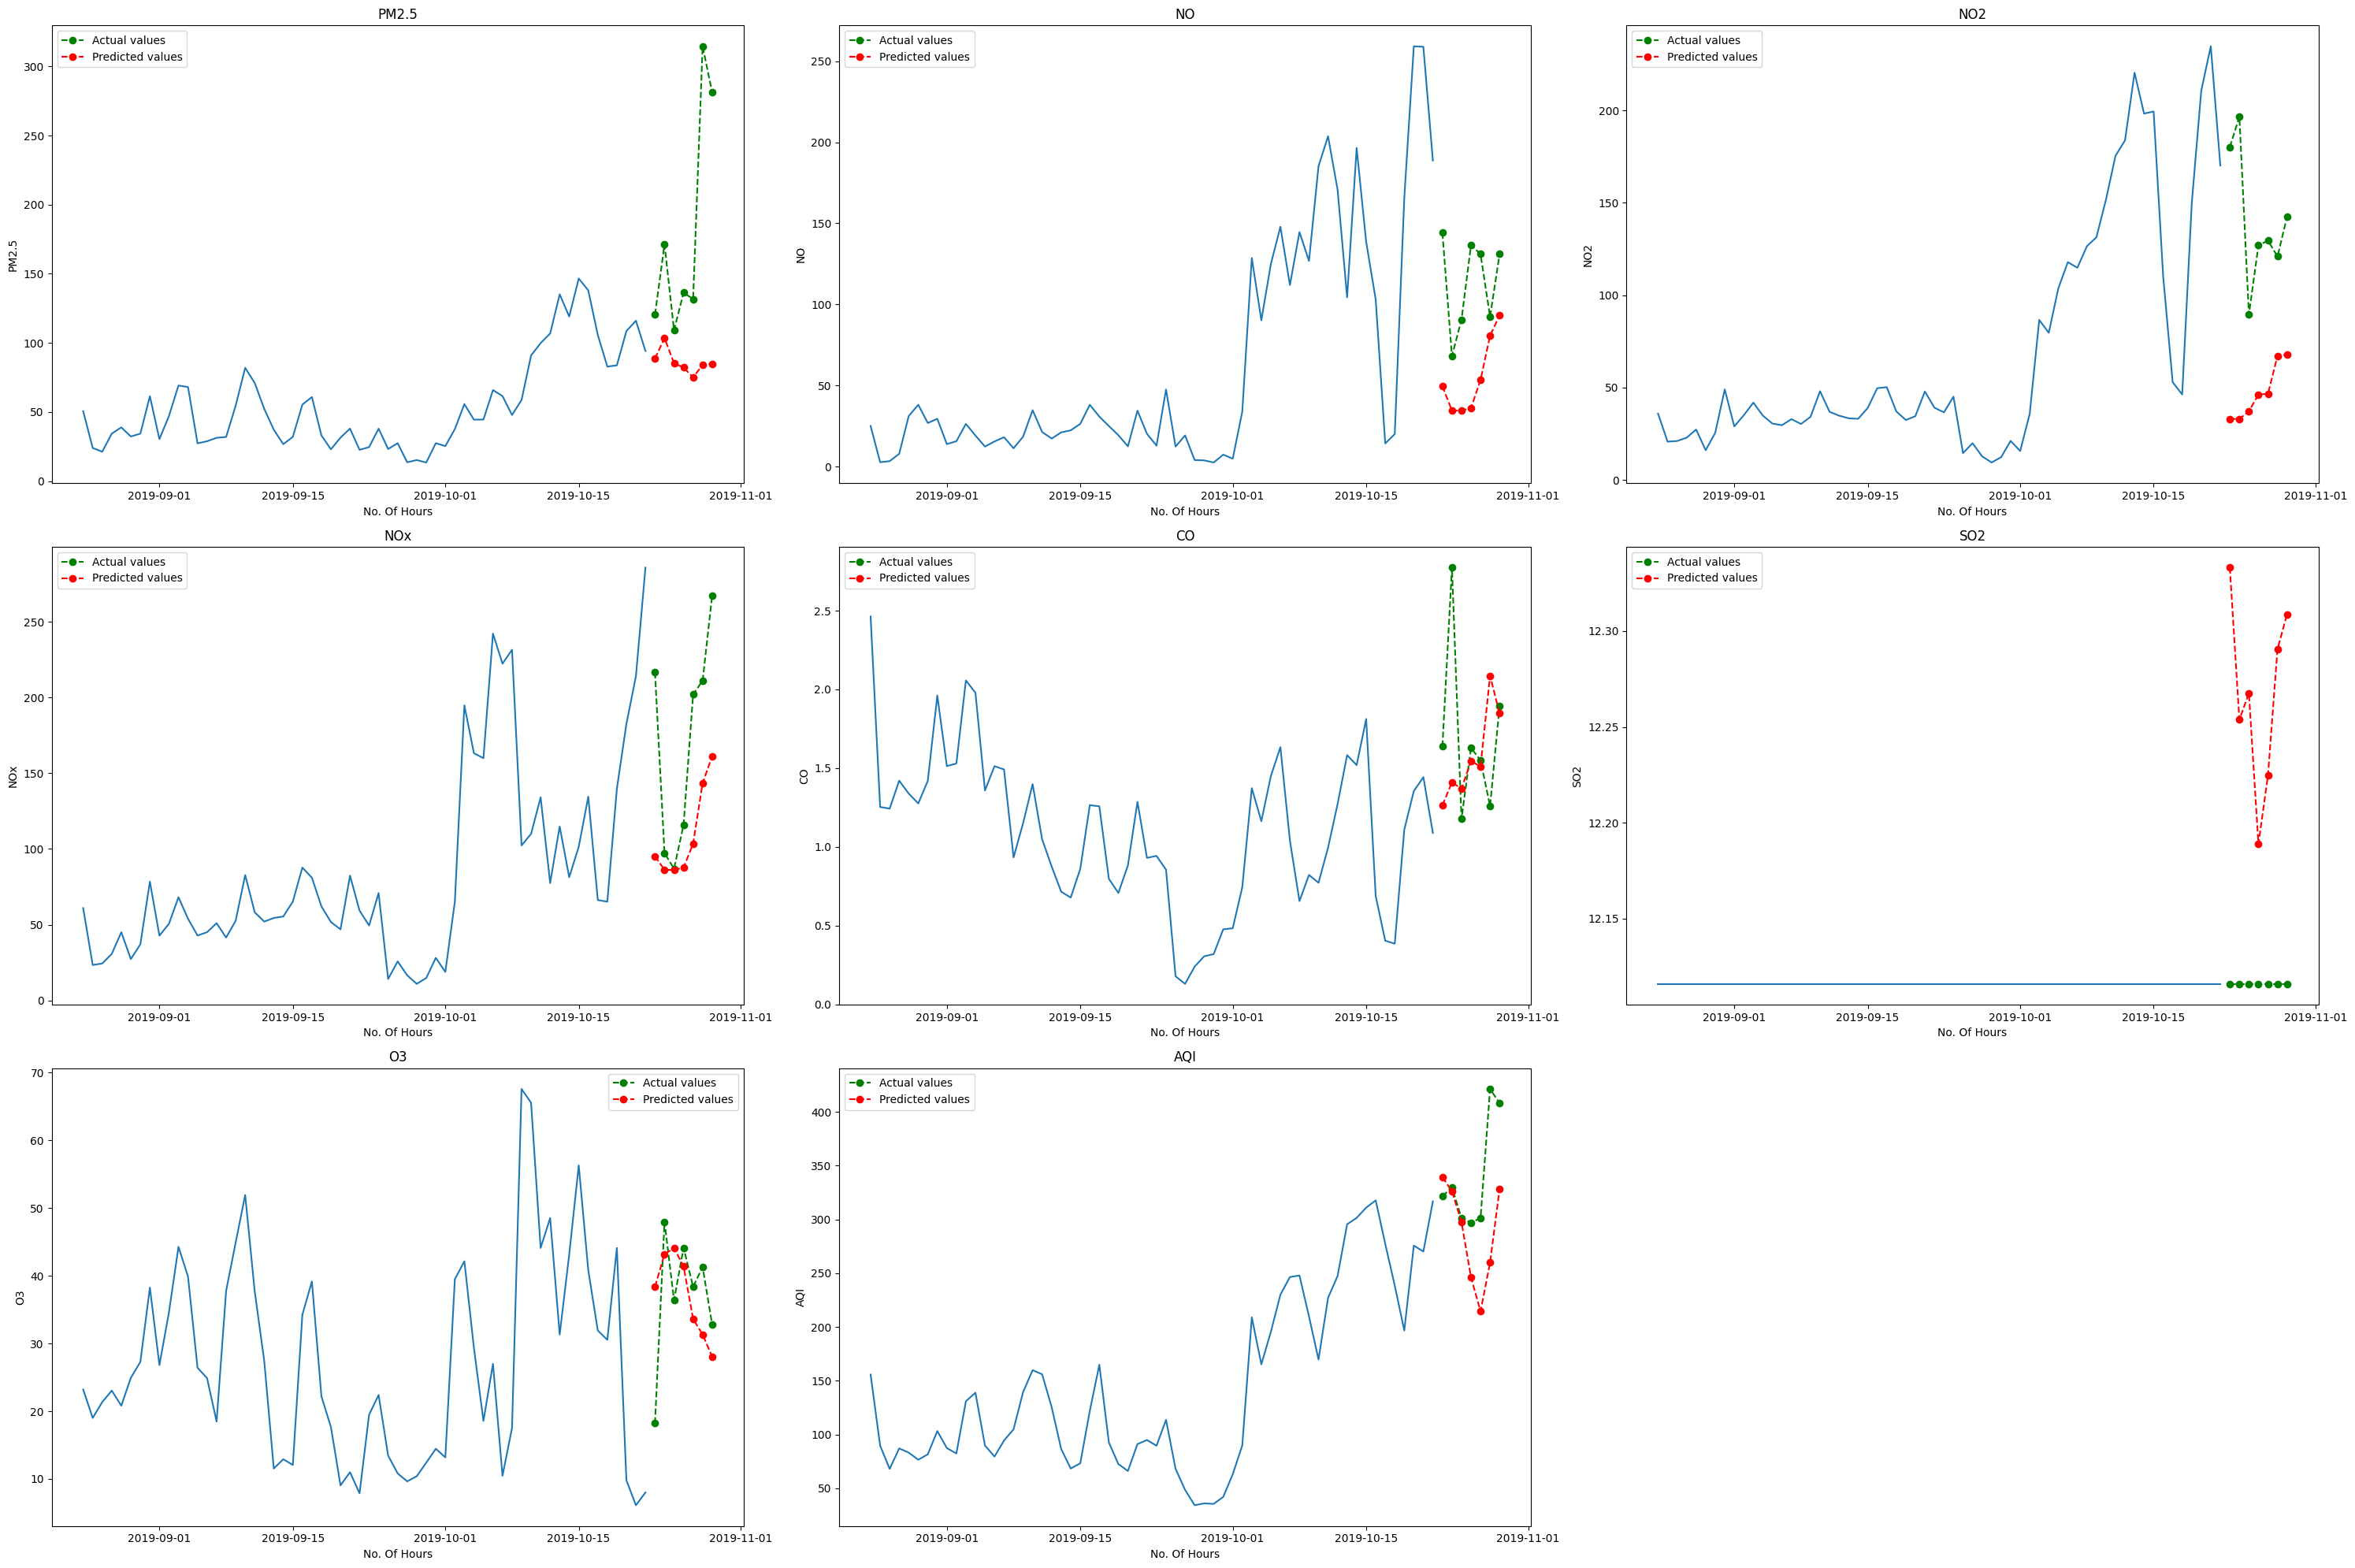

In [111]:
def makeWeeklyAirPrediction(monthData):
    dataGathered = []
    data = scaler.transform(monthData).T

    for i in range(7):
        ypredict = LSTMmodel.predict(np.array([data]))
        dataGathered.append(ypredict[0])
        data = np.concatenate([data[:, 1:], ypredict.T], axis = 1)\
    
    dataGathered = scaler.inverse_transform(np.array(dataGathered))

    #Implementation of converting the array into a dataframe

    predictionData = pd.DataFrame(dataGathered, columns = monthData.columns)
    predictionData['Date'] = monthData.iloc[53:60].index  + pd.DateOffset(days=7)
    predictionData = predictionData.set_index('Date')

    return predictionData

#Updated the function to include the dataframe conversion 

#Let's conclude this by seeing how well they predicted it in comparison to the actual one (The portion I selected is around the portion where the test data would be held)

data = DL007Data.iloc[600:660]
actualSevenDay = DL007Data.iloc[660: 667]
predictedSevenDay = makeWeeklyAirPrediction(data)


plt.figure(figsize=(30,20))

for index, column in enumerate(data.columns.tolist()[:]):
    plt.subplot(3, 3, index + 1)
    plt.plot(data[column])
    plt.plot(actualSevenDay[column], marker='o', linestyle='--', label='Actual values', color = 'green')
    plt.plot(predictedSevenDay[column], marker='o', linestyle='--', label='Predicted values', color = 'red')
    plt.xlabel('No. Of Hours')
    plt.ylabel(column)
    plt.title(column)
    plt.legend()


plt.tight_layout()
plt.show()

#It works quite nicely! Just a disclimaer, SO2's yaxis is overflated, so the machine is only misculuating the SO2 reading by 0.15 - it is still working as intended!